## Importing Libraries

In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
# creating the database connection
conn = sqlite3.connect("inventory.db")

# fetching vendor summary data
df = pd.read_sql_query("Select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [5]:
# Saving the csv file:
df.to_csv("E:\Analytics Project\Vendor_Perfomance\data\\vendor_sales_summary.csv", index=False)

## Exploratory Data Analysis
- Previously, examined the various tables in the database to identify key variables, understood their relationship and determine which one should be included in the final analysis.
- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us to understand data patterns, identify anomalies and ensure data quality before proceding with further analysis.

In [7]:
## Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10756.0,1.064325e+04,18792.512136,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10756.0,1.802448e+04,12700.566640,58.00,5740.750000,18742.500000,25509.250000,9.063100e+04
PurchasePrice,10756.0,2.432476e+01,108.949251,0.36,6.840000,10.520000,19.470000,5.681810e+03
ActualPrice,10756.0,3.555612e+01,147.812478,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10756.0,8.466346e+02,663.018277,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10756.0,3.136392e+03,11068.301869,1.00,36.000000,263.000000,1978.500000,3.376600e+05
TotalPurchaseDollars,10756.0,3.006739e+04,122767.863224,0.71,454.530000,3669.780000,20724.510000,3.811252e+06
TotalSalesQuantity,10756.0,3.073020e+03,10926.159060,0.00,33.000000,262.500000,1931.000000,3.349390e+05
TotalSalesDollars,10756.0,4.217714e+04,167242.385324,0.00,729.270000,5310.485000,28396.915000,5.101920e+06
TotalSalesPrice,10756.0,1.877998e+04,44868.818270,0.00,289.717500,2867.075000,16095.092500,6.728193e+05


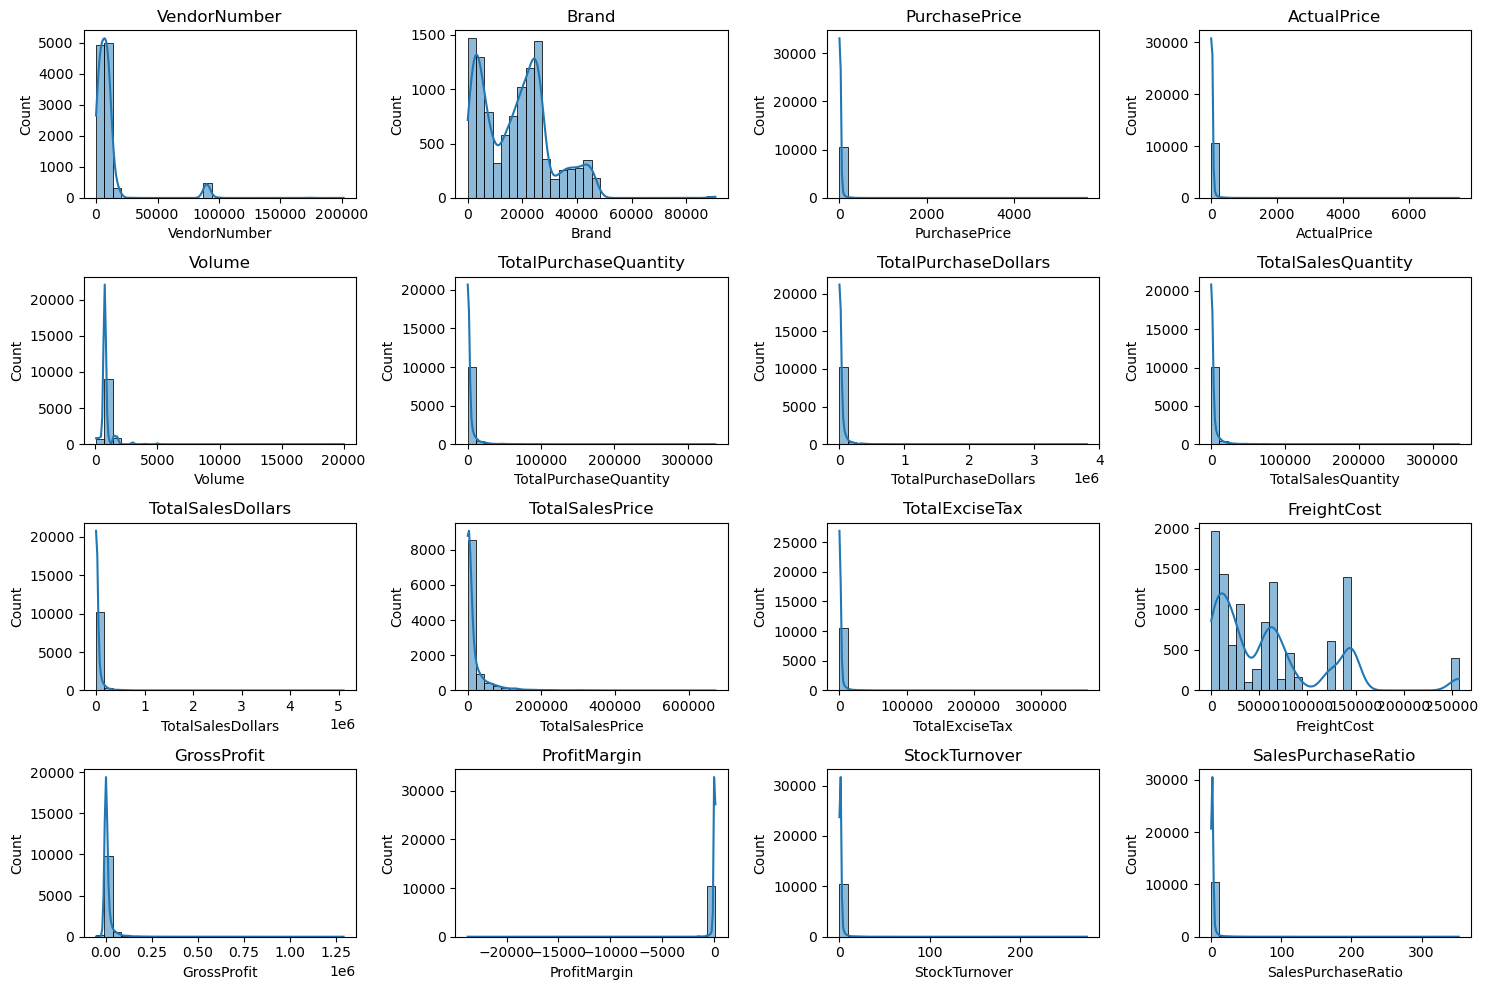

In [8]:
# Distribution for numerical cols
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

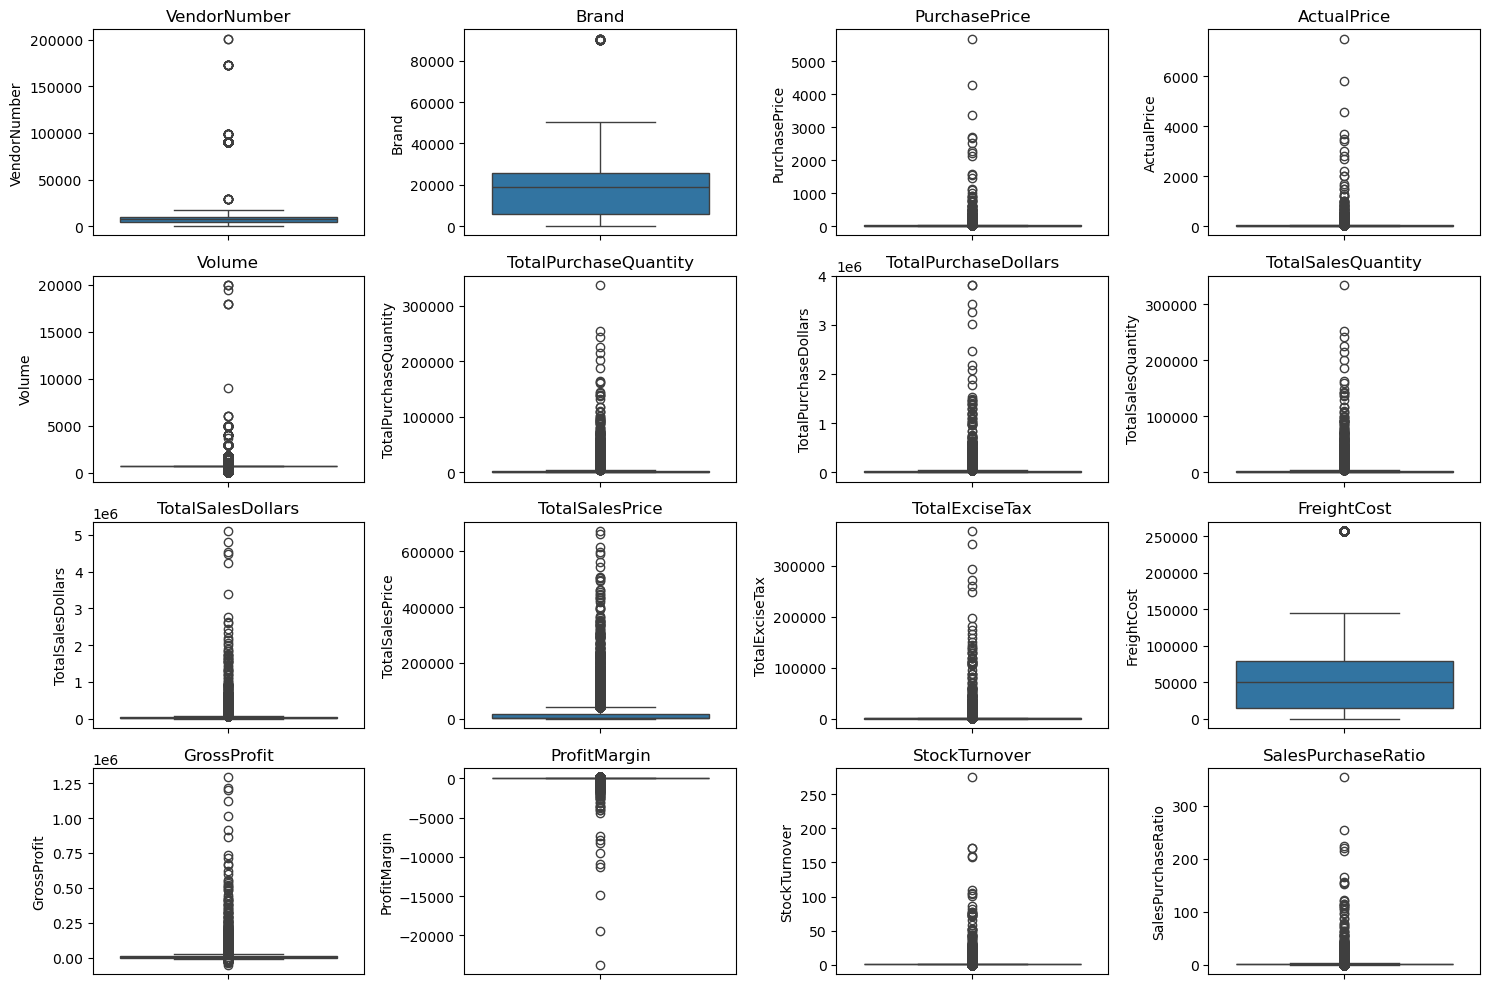

In [9]:
# Outlier detection for BoxPlot 
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Summary Statistics Insights:

#### Negative and Zero Values:
- Gross Profit: Min value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
- Profit Margin: Has a minimum of -infinity, which suggests cases where revenue is zero or even lower than cost.
- Total Sales Quantity & Sales Dollars: Minimum value are 0, meaning some of products were purchased but never sold. These colud be slow moving or obstacle stock


#### Outliers Indicated by High Std. Devations:
- Purchase & Actual Price: The max values (5,681.81 & 7,499.99) are significantly higer than the mean(24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge varation, from 0.09 to 257,032, suggests logistics inefficiences or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extermely fast while others remain in stock indefinently. Value more than 1 indicates that sold quantity for that product is higher than purchased quality due to either sales are being fulfilled from older stocks. 

In [11]:
# Lets filter out data by removing inconsistencies
df = pd.read_sql_query("""Select *
from vendor_sales_Summary
where GrossProfit > 0
and ProfitMargin > 0
and TotalSalesQuantity > 0
""",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


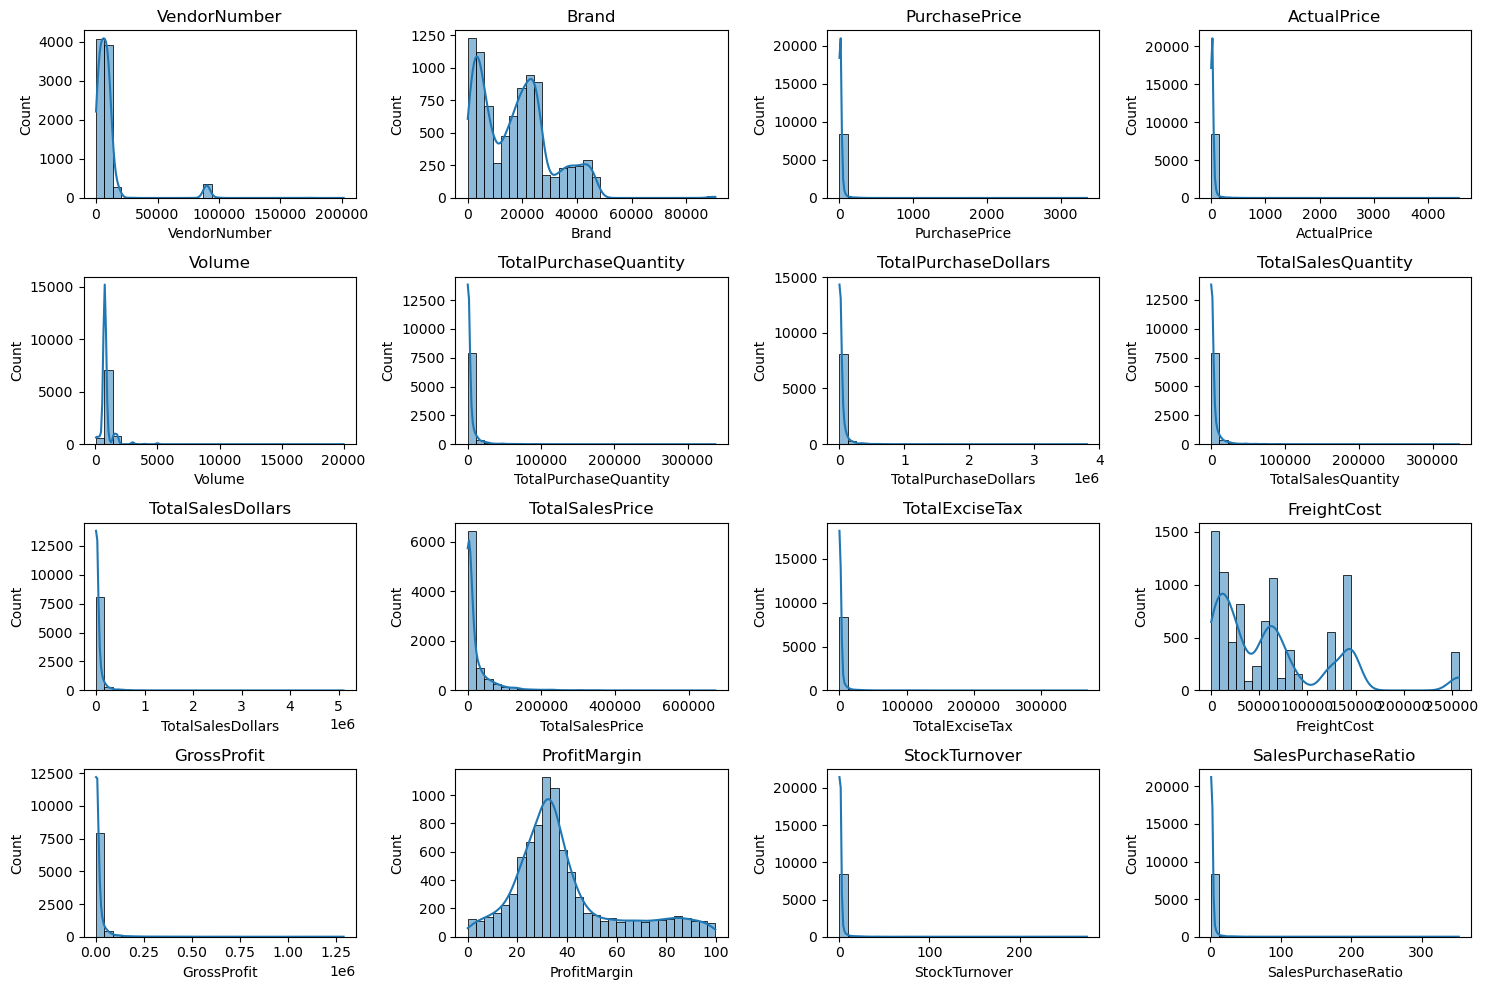

In [12]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

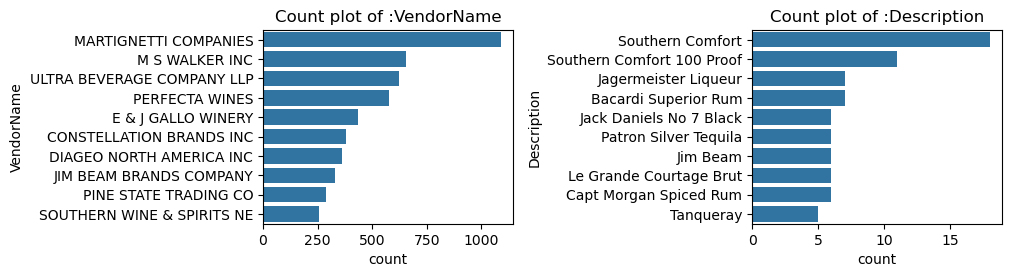

In [13]:
# Count plots for categorical cols
categorical_cols = df.select_dtypes(include="object").keys()

plt.figure(figsize=(20,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(4,4,i+1)
    sns.countplot(df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count plot of :{col}")
plt.tight_layout()
plt.show()

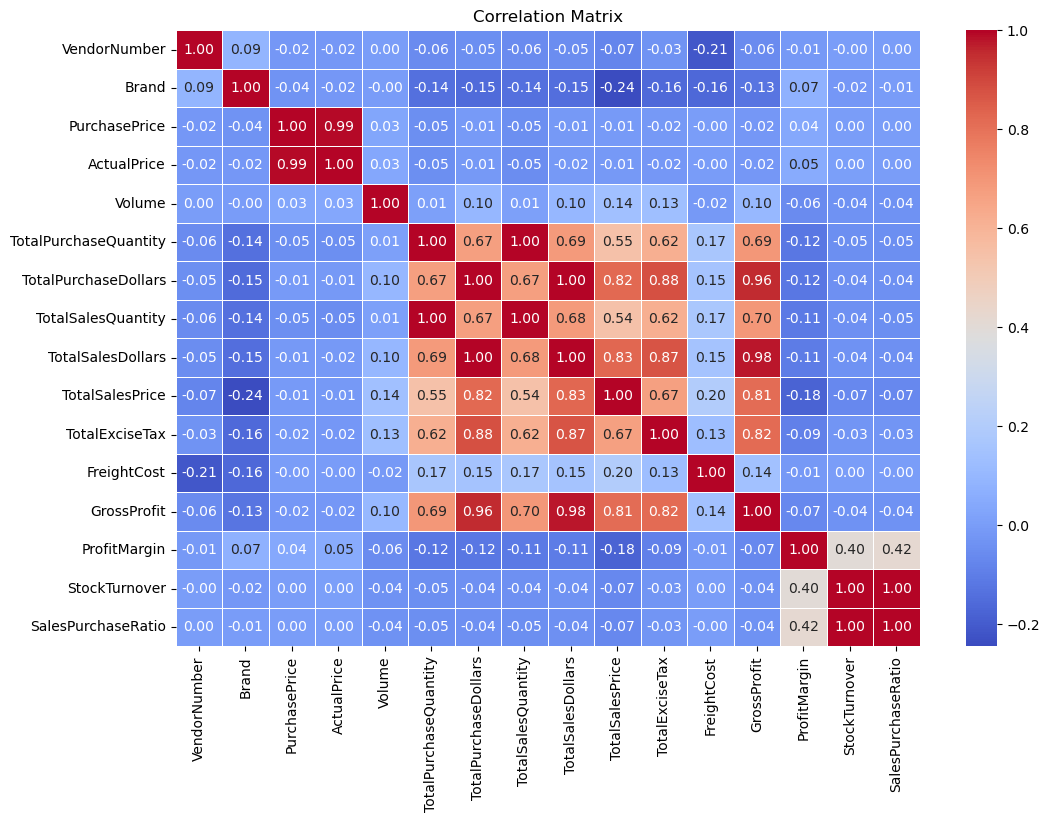

In [14]:
# Correlation Matrix
plt.figure(figsize=(12,8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidth=0.5) 
plt.title("Correlation Matrix")
plt.show()

### Correlation Insights:

- PurchasePrice has weak correlations with TotalSalesDollars(-0.012) and GrossProfit(-0.016), suggesting that price variations do not signficantly imapct sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity(0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price(-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- StockTurnover has a weak negative correlation with both Grossprofit and ProfitMargin, indicating that faster turnover does not necessarily result in higher profitability.

## Data Analysis

#### Identify brands that needs Promotional or pricing adjustments which exhibit lower sales performance but higher profit margins.

In [18]:
brand_performance = df.groupby('Description').agg({
                        'TotalSalesDollars':'sum',
                        'ProfitMargin' : 'mean'
                    }).reset_index()

In [19]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
print(f"low_sales_threshold :{low_sales_threshold}")
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)
print(f"high_margin_threshold :{high_margin_threshold}")

low_sales_threshold :560.6519999999999
high_margin_threshold :64.97017552750113


In [20]:
# Filter brands with low sales and high profit margin
target_brands = brand_performance[
                (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
                (brand_performance['ProfitMargin'] >= high_margin_threshold)     
]
print("Brands with Low Sales but High Profit Margin")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margin


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [21]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]  # for better Visualisation

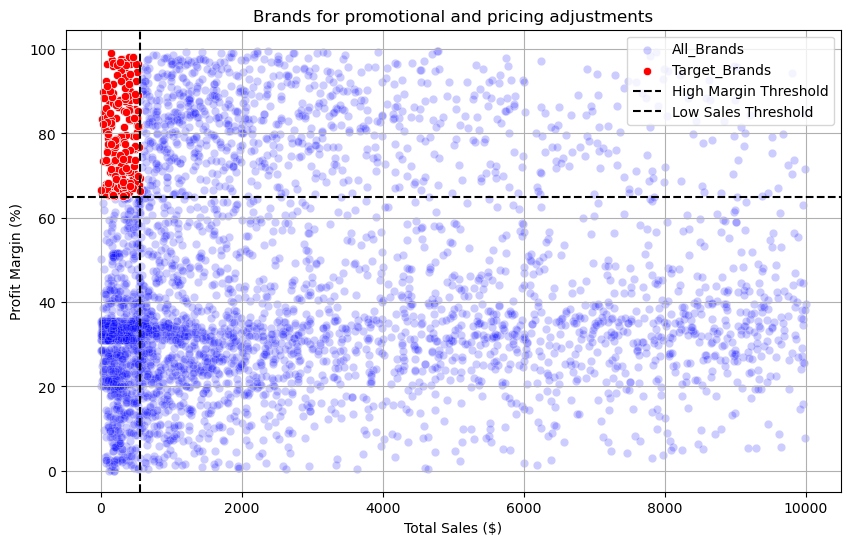

In [22]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label="All_Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label="Target_Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional and pricing adjustments")
plt.legend()
plt.grid(True)
plt.show()

#### Which Vendors and brands demonstrate the highest sales performance?

In [24]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [25]:
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_Brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [26]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.44M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
BROWN-FORMAN CORP             19.11M
E & J GALLO WINERY            18.40M
ULTRA BEVERAGE COMPANY LLP    16.53M
M S WALKER INC                14.73M
Name: TotalSalesDollars, dtype: object

In [27]:
top_Brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

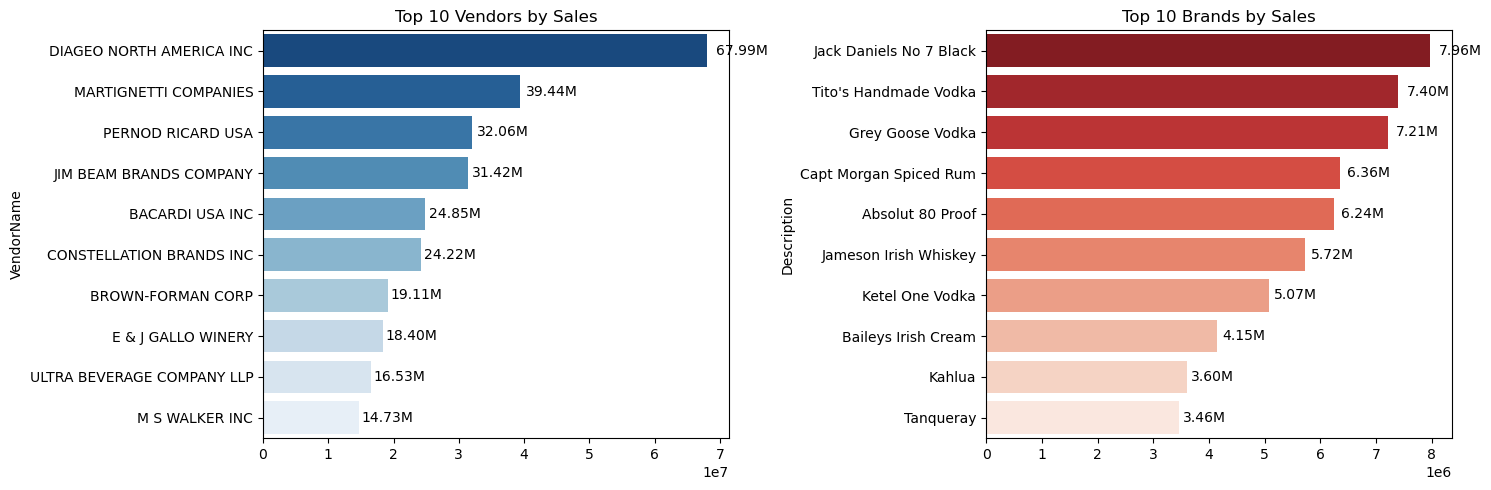

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height()/2,
            format_dollars(bar.get_width()),
            ha='left', va='center', fontsize=10, color='black')

# Plot for top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(x=top_Brands.values, y=top_Brands.index.astype(str), palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), 
            bar.get_y() + bar.get_height()/2,
            format_dollars(bar.get_width()),
            ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Which Vendor contribute the most to total purchase dollars?

In [30]:
vendor_performance = df.groupby('VendorName').agg({
                        'TotalPurchaseDollars' : 'sum',
                        'GrossProfit' : 'sum',
                        'TotalSalesDollars' : 'sum' 
                    }).reset_index()

In [31]:
vendor_performance['PurchaseContribution(%)'] = (vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum())*100

In [32]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution(%)', ascending=False),2)

In [33]:
# Display Top Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution(%)
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.23
57,MARTIGNETTI COMPANIES,25.56M,13.88M,39.44M,8.28
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.73
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.61
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.65
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.95
11,BROWN-FORMAN CORP,13.78M,5.33M,19.11M,4.47
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.91
106,ULTRA BEVERAGE COMPANY LLP,11.19M,5.34M,16.53M,3.63
79,SAZERAC CO INC,10.26M,3.49M,13.75M,3.33


In [34]:
top_vendors['CumulativeContribution(%)'] = top_vendors['PurchaseContribution(%)'].cumsum() # for comparing total % of top 10 with rest others
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution(%),CumulativeContribution(%)
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.23,16.23
57,MARTIGNETTI COMPANIES,25.56M,13.88M,39.44M,8.28,24.51
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.73,32.24
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.61,39.85
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.65,45.50
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.95,50.45
11,BROWN-FORMAN CORP,13.78M,5.33M,19.11M,4.47,54.92
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.91,58.83
106,ULTRA BEVERAGE COMPANY LLP,11.19M,5.34M,16.53M,3.63,62.46
79,SAZERAC CO INC,10.26M,3.49M,13.75M,3.33,65.79


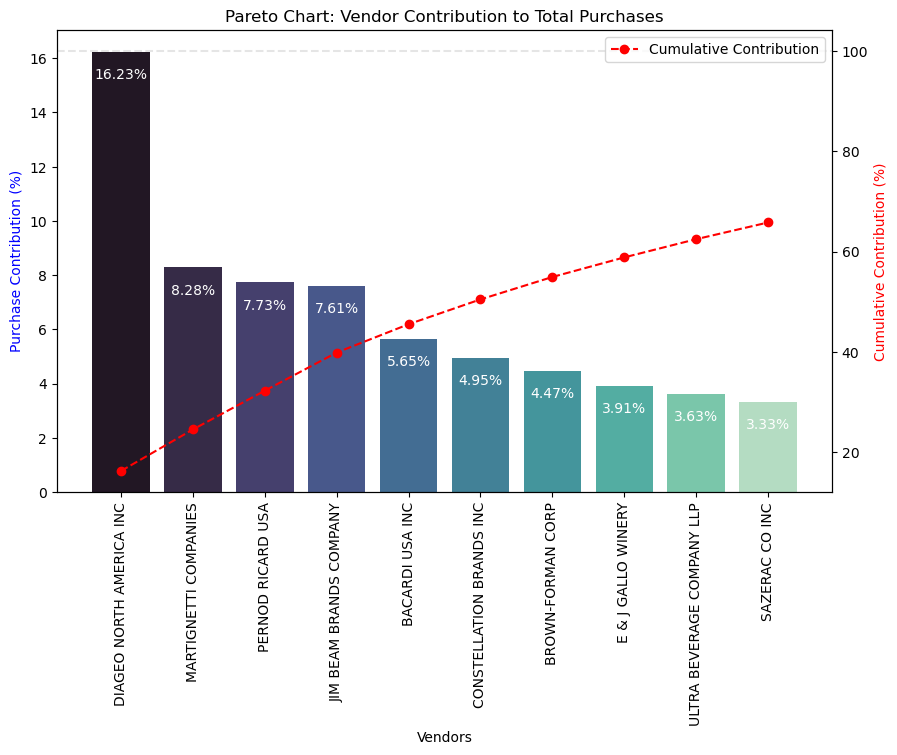

In [35]:
fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution(%)'], palette='mako', ax=ax1)

for i,value in enumerate(top_vendors['PurchaseContribution(%)']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')

ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['CumulativeContribution(%)'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution (%)', color='blue')
ax2.set_ylabel('Cumulative Contribution (%)', color='red')
ax1.set_xlabel('Vendors')

ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='grey', linestyle='dashed', alpha=0.2)
ax2.legend(loc='upper right')

plt.show()

#### How much of total procurement is dependent on the top vendors?

In [37]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution(%)'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 65.79 %


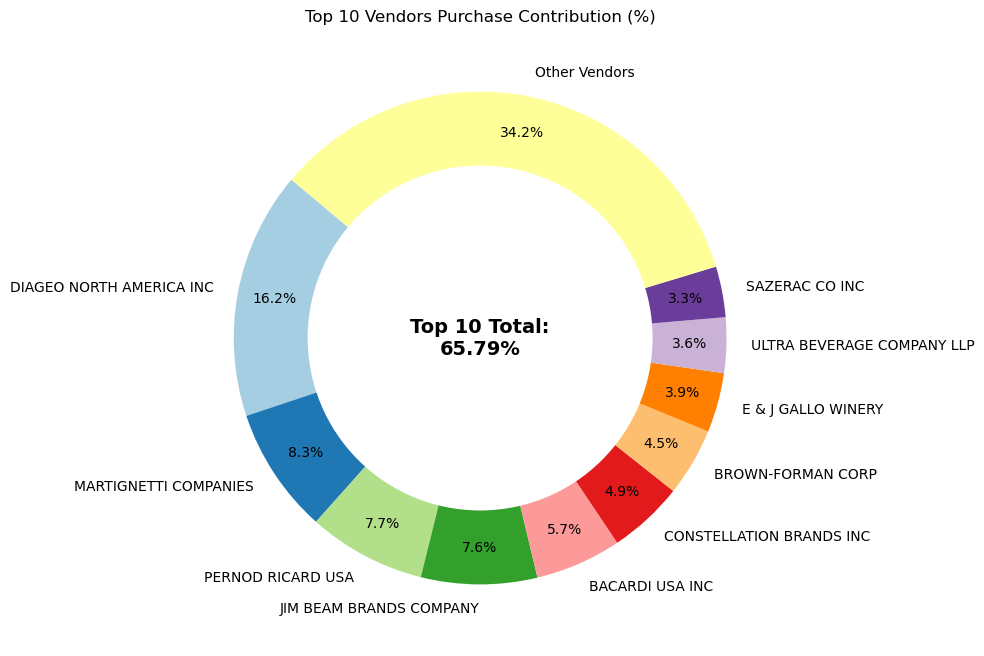

In [38]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution(%)'].values)
total_contribution = sum(purchase_contributions)
remaning_contribution = 100 - total_contribution

vendors.append("Other Vendors")
purchase_contributions.append(remaning_contribution)

# Dounut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                 startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

plt.text(0,0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendors Purchase Contribution (%)")
plt.show()

#### Does Purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost savings?

In [40]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['small', 'medium', 'large'])
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,large,145080
1,large,164038
2,large,187407
3,large,201682
4,large,138109
...,...,...
8602,small,2
8603,small,6
8604,small,2
8605,small,1


In [41]:
df.groupby('OrderSize')[['PurchasePrice']].mean()

,PurchasePrice
OrderSize,
small,38.935939
medium,15.481318
large,10.776483


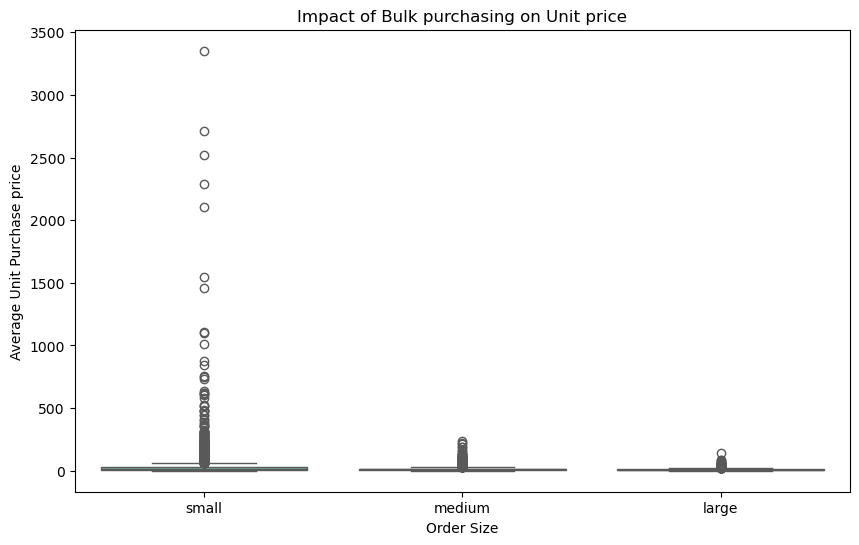

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OrderSize', y='PurchasePrice', palette='Set2')
plt.title("Impact of Bulk purchasing on Unit price")
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase price')
plt.show()

- Vendors buying in bulk(Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiency.
- The price difference between small and large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

#### Which vendors have low inventory turnover, indicating excess stock and slow moving products? 

In [45]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
PARK STREET IMPORTS LLC,0.699412
HIGHLAND WINE MERCHANTS LLC,0.708333
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#### How much capital is locked in unsold inventory per vendor, and vendors contribute the most to it?

In [47]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital : ', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital :  2.68M


In [48]:
# Aggegrate capita; locled per value
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort Vendors with the highest locked capital
invenotry_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue', ascending=False)
invenotry_value_per_vendor['UnsoldInventoryValue'] = invenotry_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
invenotry_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
79,SAZERAC CO INC,296.95K
30,E & J GALLO WINERY,228.28K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K
54,MAJESTIC FINE WINES,114.46K
